In [1]:
import pandas

The basic pandas object is a series

In [2]:
s = pandas.Series([1,2,0,-1,5.6])

In [3]:
s

0    1.0
1    2.0
2    0.0
3   -1.0
4    5.6
dtype: float64

In [4]:
print(s)

0    1.0
1    2.0
2    0.0
3   -1.0
4    5.6
dtype: float64


In [8]:
print(s.mean())
print(s.sum())
print(s.std())
print(s.abs())

1.52
7.6
2.5400787389370434
0    1.0
1    2.0
2    0.0
3    1.0
4    5.6
dtype: float64


In [10]:
s*2

0     2.0
1     4.0
2     0.0
3    -2.0
4    11.2
dtype: float64

In [21]:
a = pandas.Series([1, 2, 3])
b = pandas.Series([2, 4])

In [22]:
a+b

0    3.0
1    6.0
2    NaN
dtype: float64

In [24]:
for x in a:
    print(x,x*x)

1 1
2 4
3 9


In [25]:
[x*x for x in a]

[1, 4, 9]

Sidebar: generating random numbers:

In [26]:
import random

In [28]:
print(random.random())

0.560657056104942


In [31]:
random.normalvariate(0,1)

-0.1643736918541527

Let's create a series with the square of values, plus some added random 'noise'.

In [33]:
s2 = pandas.Series([x*x + random.normalvariate(0,1) for x in s])

In [36]:
print(s,s2)

0    1.0
1    2.0
2    0.0
3   -1.0
4    5.6
dtype: float64 0     2.037287
1     2.777986
2    -0.305110
3     0.984114
4    31.959193
dtype: float64


## Timeseries 

Suppose we want a monthly timeseries

In [38]:
import datetime as dt
months =[dt.datetime(2001, x, 1) for x in range(1,13)]

In [39]:
print(months)

[datetime.datetime(2001, 1, 1, 0, 0), datetime.datetime(2001, 2, 1, 0, 0), datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 4, 1, 0, 0), datetime.datetime(2001, 5, 1, 0, 0), datetime.datetime(2001, 6, 1, 0, 0), datetime.datetime(2001, 7, 1, 0, 0), datetime.datetime(2001, 8, 1, 0, 0), datetime.datetime(2001, 9, 1, 0, 0), datetime.datetime(2001, 10, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0), datetime.datetime(2001, 12, 1, 0, 0)]


One way to create series with a custom index is dictionaries: keys are the index, and values are the values. Here we will create a dictionary associating each of the dates with a random value

In [43]:
dictdate = {}
for i in months:
    dictdate[i] = random.normalvariate(0,1)
print(dictdate)

{datetime.datetime(2001, 3, 1, 0, 0): 1.9930541257895082, datetime.datetime(2001, 7, 1, 0, 0): -0.09770852880769107, datetime.datetime(2001, 4, 1, 0, 0): -0.4427403214046884, datetime.datetime(2001, 6, 1, 0, 0): 0.6324365225035954, datetime.datetime(2001, 12, 1, 0, 0): -0.7985941329043514, datetime.datetime(2001, 10, 1, 0, 0): 0.5980715269932478, datetime.datetime(2001, 1, 1, 0, 0): 0.5405608195443754, datetime.datetime(2001, 2, 1, 0, 0): -0.6657886452449968, datetime.datetime(2001, 11, 1, 0, 0): 0.6170184896351997, datetime.datetime(2001, 5, 1, 0, 0): -0.03189838803223715, datetime.datetime(2001, 9, 1, 0, 0): -0.786667169494074, datetime.datetime(2001, 8, 1, 0, 0): 1.925082656513402}


Just like list comprehension, there is also dictionary comprehension: creating a dictionary from a known set of keys. The above code is equvalent to:

In [44]:
dictdate = {i: random.normalvariate(0,1) for i in months}

In [45]:
dictdate

{datetime.datetime(2001, 1, 1, 0, 0): -2.1122953687716186,
 datetime.datetime(2001, 2, 1, 0, 0): -0.7945864958537286,
 datetime.datetime(2001, 3, 1, 0, 0): 1.183008109198705,
 datetime.datetime(2001, 4, 1, 0, 0): -0.5080163685391752,
 datetime.datetime(2001, 5, 1, 0, 0): 0.41732694520834507,
 datetime.datetime(2001, 6, 1, 0, 0): 0.5138108839283753,
 datetime.datetime(2001, 7, 1, 0, 0): -0.23996039337403804,
 datetime.datetime(2001, 8, 1, 0, 0): -0.6659201555967498,
 datetime.datetime(2001, 9, 1, 0, 0): -0.8249148151984703,
 datetime.datetime(2001, 10, 1, 0, 0): 0.0787903947294768,
 datetime.datetime(2001, 11, 1, 0, 0): -0.08653294216526768,
 datetime.datetime(2001, 12, 1, 0, 0): -0.20571842373017984}

Now that we have a dictionary associating dates with values, we can turn it into pandas series

In [47]:
time_series = pandas.Series(dictdate)

In [48]:
time_series

2001-01-01   -2.112295
2001-02-01   -0.794586
2001-03-01    1.183008
2001-04-01   -0.508016
2001-05-01    0.417327
2001-06-01    0.513811
2001-07-01   -0.239960
2001-08-01   -0.665920
2001-09-01   -0.824915
2001-10-01    0.078790
2001-11-01   -0.086533
2001-12-01   -0.205718
dtype: float64

In [49]:
time_series.cumsum()

2001-01-01   -2.112295
2001-02-01   -2.906882
2001-03-01   -1.723874
2001-04-01   -2.231890
2001-05-01   -1.814563
2001-06-01   -1.300752
2001-07-01   -1.540713
2001-08-01   -2.206633
2001-09-01   -3.031548
2001-10-01   -2.952757
2001-11-01   -3.039290
2001-12-01   -3.245009
dtype: float64

Lets do a quick plot

In [50]:
%matplotlib inline

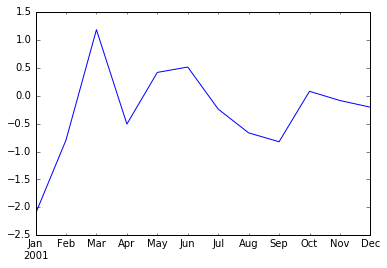

In [51]:
time_series.plot()

In [53]:
time_series.cumsum().plot()

Instead of using a loop to create the date series we can use pandas

In [54]:
dates2 = pandas.date_range('1/1/2000', periods = 120)

In [57]:
help(pandas.date_range)

Help on function date_range in module pandas.tseries.index:

date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency datetime index, with day (calendar) as the default
    frequency
    
    Parameters
    ----------
    start : string or datetime-like, default None
        Left bound for generating dates
    end : string or datetime-like, default None
        Right bound for generating dates
    periods : integer or None, default None
        If None, must specify start and end
    freq : string or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'
    tz : string or None
        Time zone name for returning localized DatetimeIndex, for example
    Asia/Hong_Kong
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range
    name : str, default None
        Name of the resulting index
    closed : st

Lets create two new random walks

In [62]:
ts1 = pandas.Series([random.normalvariate(0,1) for x in range(120)], index=dates2)
ts2 = pandas.Series([random.normalvariate(0,1) for x in range(120)], index=dates2)

ts1 = ts1.cumsum()
ts2 = ts2.cumsum()
print(ts1.head())
print(ts2.tail())

2000-01-01    0.213807
2000-01-02    0.522790
2000-01-03    0.244995
2000-01-04   -1.419644
2000-01-05   -1.663106
Freq: D, dtype: float64
2000-04-25   -6.925088
2000-04-26   -7.579842
2000-04-27   -6.913701
2000-04-28   -7.754808
2000-04-29   -8.302156
Freq: D, dtype: float64


In [65]:
print(ts2.corr(ts1))

0.651396102407


In [66]:
help(ts2.corr)

Help on method corr in module pandas.core.series:

corr(other, method='pearson', min_periods=None) method of pandas.core.series.Series instance
    Compute correlation with `other` Series, excluding missing values
    
    Parameters
    ----------
    other : Series
    method : {'pearson', 'kendall', 'spearman'}
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
    min_periods : int, optional
        Minimum number of observations needed to have a valid result
    
    
    Returns
    -------
    correlation : float



In [67]:
print(ts2.corr(ts1, method = "spearman"))

0.70106257379


In [68]:
ts1.autocorr()

0.9697737235350532

In [71]:
help(ts1.autocorr)

Help on method autocorr in module pandas.core.series:

autocorr(lag=1) method of pandas.core.series.Series instance
    Lag-N autocorrelation
    
    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.
    
    Returns
    -------
    autocorr : float



## Dataframes

In Pandas a dataframe is composed of series with a shared index, each series is a column, and each indexvalue is a row

In [72]:
df = pandas.DataFrame({"Col1": ts1, "Col2": ts2})

In [73]:
df

Col1      Col2
2000-01-01   0.213807 -0.530574
2000-01-02   0.522790 -1.816105
2000-01-03   0.244995 -2.408098
2000-01-04  -1.419644 -2.730732
2000-01-05  -1.663106 -3.141113
2000-01-06  -2.803504 -3.199232
2000-01-07  -3.499466 -3.369751
2000-01-08  -3.928482 -2.663149
2000-01-09  -4.205557 -2.115223
2000-01-10  -5.286658 -2.677684
2000-01-11  -5.643226 -2.626035
2000-01-12  -5.965633 -2.231284
2000-01-13  -4.771044 -2.525562
2000-01-14  -4.365724 -2.411430
2000-01-15  -3.940371 -1.881871
2000-01-16  -2.690347 -2.773870
2000-01-17  -1.473668 -3.749795
2000-01-18  -3.953104 -2.118257
2000-01-19  -4.393859 -1.971444
2000-01-20  -4.424364  0.035402
2000-01-21  -6.125517  1.059046
2000-01-22  -5.346378 -0.306284
2000-01-23  -5.628823 -0.087523
2000-01-24  -6.395846 -1.637384
2000-01-25  -6.434839 -3.516371
2000-01-26  -5.853698 -1.976742
2000-01-27  -6.654016 -2.376100
2000-01-28  -7.401789 -2.632285
2000-01-29  -5.910394 -2.324153
2000-01-30  -6.737964 -1.958062
...               ...       ...
2000-03-31 -12.858922 -8.683119
2000-04-01 -12.206026 -8.004346
2000-04-02 -12.094592 -8.959376
2000-04-03 -12.456076 -8.426267
2000-04-04 -12.192346 -7.034301
2000-04-05 -13.154092 -6.018082
2000-04-06 -12.330194 -6.204171
2000-04-07 -11.854018 -6.670455
2000-04-08 -12.143563 -5.814833
2000-04-09 -12.367859 -6.153150
2000-04-10 -13.327937 -6.401359
2000-04-11 -14.174968 -5.697658
2000-04-12 -13.171233 -5.063762
2000-04-13 -12.243412 -4.596500
2000-04-14 -11.487555 -4.726835
2000-04-15 -12.205165 -5.956516
2000-04-16 -11.056393 -6.377977
2000-04-17 -10.888420 -6.893296
2000-04-18  -9.261289 -7.176682
2000-04-19  -7.830637 -7.660906
2000-04-20  -8.411499 -6.363617
2000-04-21  -8.743662 -5.528430
2000-04-22  -6.891867 -5.948705
2000-04-23  -6.453734 -6.438624
2000-04-24  -4.885999 -5.772642
2000-04-25  -3.333354 -6.925088
2000-04-26  -2.029548 -7.579842
2000-04-27  -2.451466 -6.913701
2000-04-28  -1.567584 -7.754808
2000-04-29  -1.593305 -8.302156

[120 rows x 2 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2000-01-01 to 2000-04-29
Freq: D
Data columns (total 2 columns):
Col1    120 non-null float64
Col2    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


In [78]:
df.columns

Index(['Col1', 'Col2'], dtype='object')

In [80]:
df.dtypes

Col1    float64
Col2    float64
dtype: object

In [83]:
df.head(2)

Col1      Col2
2000-01-01  0.213807 -0.530574
2000-01-02  0.522790 -1.816105

In [85]:
df.corr()

Col1      Col2
Col1  1.000000  0.651396
Col2  0.651396  1.000000

In [86]:
df["Col1"]

2000-01-01     0.213807
2000-01-02     0.522790
2000-01-03     0.244995
2000-01-04    -1.419644
2000-01-05    -1.663106
2000-01-06    -2.803504
2000-01-07    -3.499466
2000-01-08    -3.928482
2000-01-09    -4.205557
2000-01-10    -5.286658
2000-01-11    -5.643226
2000-01-12    -5.965633
2000-01-13    -4.771044
2000-01-14    -4.365724
2000-01-15    -3.940371
2000-01-16    -2.690347
2000-01-17    -1.473668
2000-01-18    -3.953104
2000-01-19    -4.393859
2000-01-20    -4.424364
2000-01-21    -6.125517
2000-01-22    -5.346378
2000-01-23    -5.628823
2000-01-24    -6.395846
2000-01-25    -6.434839
2000-01-26    -5.853698
2000-01-27    -6.654016
2000-01-28    -7.401789
2000-01-29    -5.910394
2000-01-30    -6.737964
                ...    
2000-03-31   -12.858922
2000-04-01   -12.206026
2000-04-02   -12.094592
2000-04-03   -12.456076
2000-04-04   -12.192346
2000-04-05   -13.154092
2000-04-06   -12.330194
2000-04-07   -11.854018
2000-04-08   -12.143563
2000-04-09   -12.367859
2000-04-10   -13

In [87]:
df["new"] = random.normalvariate(0,1)

In [88]:
df.head()

Col1      Col2       new
2000-01-01  0.213807 -0.530574 -2.055854
2000-01-02  0.522790 -1.816105 -2.055854
2000-01-03  0.244995 -2.408098 -2.055854
2000-01-04 -1.419644 -2.730732 -2.055854
2000-01-05 -1.663106 -3.141113 -2.055854

## Working with real data

In [3]:
movie = pandas.read_csv("MovieData (5).csv", sep = "\t")

In [4]:
movie.head()

Release_Date                                     Movie  Distributor  \
0     03/09/12                               John Carter          NaN   
1     05/25/07  Pirates of the Caribbean: At World's End  Buena Vista   
2     12/13/13          The Hobbit: There and Back Again     New Line   
3     12/14/12         The Hobbit: An Unexpected Journey     New Line   
4     11/24/10                                   Tangled  Buena Vista   

      Budget   US Gross Worldwide Gross  
0  300000000   66439100       254439100  
1  300000000  309420425       960996492  
2  270000000    Unknown         Unknown  
3  270000000    Unknown         Unknown  
4  260000000  200821936       586581936

In [31]:
movie = pandas.read_csv("MovieData3.txt", sep = "\t") #Ive imported it as txt after I have deleted all the inverted commas "

In [32]:
 movie.head()

Release_Date                                     Movie  Distributor  \
0     03/09/12                               John Carter          NaN   
1     05/25/07  Pirates of the Caribbean: At World's End  Buena Vista   
2     12/13/13          The Hobbit: There and Back Again     New Line   
3     12/14/12         The Hobbit: An Unexpected Journey     New Line   
4     11/24/10                                   Tangled  Buena Vista   

      Budget   US Gross Worldwide Gross Unnamed: 6 Unnamed: 7  
0  300000000   66439100       254439100        NaN        NaN  
1  300000000  309420425       960996492        NaN        NaN  
2  270000000    Unknown         Unknown        NaN        NaN  
3  270000000    Unknown         Unknown        NaN        NaN  
4  260000000  200821936       586581936        NaN        NaN

In [33]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 8 columns):
Release_Date       3627 non-null object
Movie              3627 non-null object
Distributor        2982 non-null object
Budget             3615 non-null object
US Gross           3625 non-null object
Worldwide Gross    3627 non-null object
Unnamed: 6         63 non-null object
Unnamed: 7         6 non-null object
dtypes: object(8)
memory usage: 113.4+ KB


In [34]:
movie.columns

Index(['Release_Date', 'Movie', 'Distributor', 'Budget', 'US Gross',
       'Worldwide Gross', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [35]:
movie = movie.drop('Unnamed: 6', 1)
movie = movie.drop('Unnamed: 7', 1)

In [36]:
movie.columns

Index(['Release_Date', 'Movie', 'Distributor', 'Budget', 'US Gross',
       'Worldwide Gross'],
      dtype='object')

movie.dtypes

In [38]:
movie.head()

Release_Date                                     Movie  Distributor  \
0     03/09/12                               John Carter          NaN   
1     05/25/07  Pirates of the Caribbean: At World's End  Buena Vista   
2     12/13/13          The Hobbit: There and Back Again     New Line   
3     12/14/12         The Hobbit: An Unexpected Journey     New Line   
4     11/24/10                                   Tangled  Buena Vista   

      Budget   US Gross Worldwide Gross  
0  300000000   66439100       254439100  
1  300000000  309420425       960996492  
2  270000000    Unknown         Unknown  
3  270000000    Unknown         Unknown  
4  260000000  200821936       586581936

In [39]:
movie.tail()

Release_Date                          Movie  Distributor Budget US Gross  \
3622     05/26/06                         Cavite  Truly Indie   7000    70071   
3623     01/01/04                The Mongol King   CustomFlix   7000      900   
3624     04/04/99                      Following    Zeitgeist   6000    48482   
3625     07/13/05  Return to the Land of Wonders          NaN   5000     1338   
3626     08/05/05              My Date With Drew          NaN   1100   181041   

     Worldwide Gross  
3622           71644  
3623         Unknown  
3624          240495  
3625         Unknown  
3626           Unkno

In [41]:
movie = movie.fillna(0) # fill the NaN with zero

We can tell pandas to parse one or more columns as dates when loading the data, using the *parse_dates* parameter. If we assigne a list of column numbers to it, it will attempt to automatically parse those columns as dates.

We can also change *Unknown* and *Unkno* to be *NaN*

In [47]:
movie = pandas.read_csv("MovieData3.txt", sep = "\t", na_values = ["Unknown", "Unkno"], parse_dates = [0])
movie = movie.drop(['Unnamed: 6', 'Unnamed: 7'], 1)

In [48]:
movie.tail()

Release_Date                          Movie  Distributor Budget US Gross  \
3622   2006-05-26                         Cavite  Truly Indie   7000    70071   
3623   2004-01-01                The Mongol King   CustomFlix   7000      900   
3624   1999-04-04                      Following    Zeitgeist   6000    48482   
3625   2005-07-13  Return to the Land of Wonders          NaN   5000     1338   
3626   2005-08-05              My Date With Drew          NaN   1100   181041   

      Worldwide Gross  
3622          71644.0  
3623              NaN  
3624         240495.0  
3625              NaN  
3626              NaN

In [49]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 6 columns):
Release_Date       3627 non-null datetime64[ns]
Movie              3626 non-null object
Distributor        2982 non-null object
Budget             3615 non-null object
US Gross           3543 non-null object
Worldwide Gross    2373 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 113.4+ KB


In [51]:
min(movie["Release_Date"])

Timestamp('1966-02-23 00:00:00')

In [52]:
max(movie["Release_Date"])

Timestamp('2065-12-29 00:00:00')

The build in parse function hasnt figured out which dates are before and which dates after the 21st century. We can call out function from last week

In [7]:
import datetime as dt
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [8]:
movies = pandas.read_csv("MovieData (5).csv", sep='\t', na_values=["Unknown", "Unkno"], 
                         parse_dates=[0], date_parser=make_date)
# movies = movies.drop(['Unnamed: 6', 'Unnamed: 7'], 1)

We are only passing the the name of the function, without the ususal parentheses. We are passing the name of our parser function, which the *read_csv()* function can call on its own. For each entry, pandas will automatically call the function, and put its return value in the column. Functions in Python are first class objects, and can be passed as arguments just like any other data type

In [9]:
print(movies.Release_Date.min())
print(movies.Release_Date.max())

1915-02-08 00:00:00
2013-12-13 00:00:00


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 6 columns):
Release_Date       3627 non-null datetime64[ns]
Movie              3626 non-null object
Distributor        2968 non-null object
Budget             3627 non-null int64
US Gross           3541 non-null float64
Worldwide Gross    2350 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 141.7+ KB


In [97]:
 def to_number(s):
    try:
        return int(s)
    except:
        return None

In [111]:
converted = movies.apply(lambda f : to_number(f[3]) , axis = 1)  
converted2 = movies.apply(lambda f : to_number(f[4]) , axis = 1)  

In [119]:
movies["Budget"] = converted
movies["US Gross"] = converted2
movies = movies.fillna(0)

In [120]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 7 columns):
Release_Date       3627 non-null datetime64[ns]
Movie              3627 non-null object
Distributor        3627 non-null object
Budget             3627 non-null float64
US Gross           3627 non-null float64
Worldwide Gross    3627 non-null float64
Non_US_Gross       3627 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 170.1+ KB


In [11]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]

In [12]:
movies.Non_US_Gross.min()

0.0

Min and Max are build in series functions, which can be called for columns

## Subsetting

In [123]:
movies[movies.Non_US_Gross < 0]

Release_Date                               Movie  \
103    2012-11-16    The Twilight Saga: Breaking Dawn   
174    2008-03-07                                  10   
272    1998-11-13                      Meet Joe Black   
274    2000-11-22                      102 Dalmatians   
280    2012-03-30                       Mirror Mirror   
310    1998-06-12                            Six Days   
313    2000-01-01                Fantasia 2000 (IMAX)   
321    2000-06-16  Fantasia 2000 (Theatrical Release)   
324    1998-12-25                    Mighty Joe Young   
339    1997-12-25                         The Postman   
384    1999-07-23                    Inspector Gadget   
390    1999-12-17                   Anna and the King   
397    1998-10-23                             Soldier   
405    2001-02-23                          Monkeybone   
434    1998-01-16                           Hard Rain   
449    2002-09-20           Ballistic: Ecks vs. Sever   
465    2001-08-10                       Osmosis Jones   
471    1989-08-09                           The Abyss   
483    1996-09-20                   Last Man Standing   
489    2000-10-27                       Lucky Numbers   
492    2000-07-07                             The Kid   
494    1991-05-24                         Hudson Hawk   
513    1996-10-11             The Long Kiss Goodnight   
519    1998-03-20                      Primary Colors   
523    1994-06-24                          Wyatt Earp   
538    1998-04-03                      Mercury Rising   
553    1998-10-09                            Holy Man   
562    1999-02-12                 My Favorite Martian   
580    2000-01-14                           Supernova   
585    1998-12-25                      A Civil Action   
...           ...                                 ...   
3584   2005-01-28                               Peace   
3586   1998-02-20        I Love You … Don't Touch Me!   
3590   1995-08-09               The Brothers McMullen   
3591   2001-03-16                            Gabriela   
3592   2010-11-12                      Tiny Furniture   
3594   2010-03-12                  The Exploding Girl   
3595   2000-08-25       Smiling Fish and Goat on Fire   
3596   2002-04-05                      The Last Waltz   
3597   2005-04-29                         Funny Ha Ha   
3598   2010-10-15                        Down Terrace   
3599   2006-09-01                 Mutual Appreciation   
3600   1999-12-24                      Pink Narcissus   
3602   2000-01-14                       The Terrorist   
3604   1972-06-30                         Deep Throat   
3605   1997-08-01               In the Company of Men   
3606   1991-08-01                             Slacker   
3609   2010-04-02                    Breaking Upwards   
3610   2006-06-02                     The Puffy Chair   
3611   1997-04-11                      Pink Flamingos   
3612   2006-04-28            Grip: A Criminal's Story   
3613   1996-04-01                                Bang   
3614   2008-08-14     The Rise and Fall of Miss Thang   
3615   2006-04-28                               Clean   
3616   2004-05-28                     On the Down Low   
3617   2001-07-06                                Cure   
3618   2001-03-09                             Dayereh   
3619   2012-01-13                           Newlyweds   
3623   2004-01-01                     The Mongol King   
3625   2005-07-13       Return to the Land of Wonders   
3626   2005-08-05                   My Date With Drew   

                            Distributor      Budget     US Gross  \
103                              Part 2         0.0  136200000.0   
174                            000 B.C.         0.0  105000000.0   
272                           Universal  85000000.0   44650003.0   
274                         Buena Vista  85000000.0   66941559.0   
280                                   0  85000000.0   19662216.0   
310                        Seven Nights         0.0   80000000

Lets look at the maximum or minimum values of Non-US Gross when Worldwide Gross columns is zero. The result of a square bracket notation can be treated just like a DataFrame - we can select columns, and it will only return the coulmn values that are within our subset

In [131]:
movies[movies["Worldwide Gross"] == 0].Non_US_Gross.max() # movies[movies["Worldwide Gross"]==0]["Non_US_Gross"].max()

0.0

Lets fill the missing WorldWide Gross values with the US Gross. Wew can use subset notation again, but this time with assignment. For assignments we put the column first, then the subset

In [136]:
movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"] # we can ignore the warning below

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [137]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]
movies[movies.Non_US_Gross < 0]

Release_Date                                        Movie  \
174    2008-03-07                                           10   
310    1998-06-12                                     Six Days   
615    2008-09-05                                          Che   
951    2002-04-26                                         Life   
1352   1999-10-01                                      Mystery   
1471   1988-04-01                                Bright Lights   
1771   1998-03-27           Couloirs du temps: Les visiteurs 2   
1797   2008-10-24                                   Synecdoche   
1851   2009-12-30  Weisse Band: Eine deutsche Kindergeschichte   
1887   2009-07-10                                   I Love You   
1994   2010-02-26                          Yellow Handkerchief   
2007   2005-10-21                                    Kiss Kiss   
2165   1977-06-22                                     New York   
2186   2007-05-04                                        Paris   
2189   2010-12-03                                   I Love You   
2246   1982-02-10                                         Boot   
2397   2008-05-23                                          War   
2712   2004-09-03                                  Remember Me   
2728   2004-02-27                                      Goodbye   
2858   2007-08-03                                       Gandhi   
2992   1987-03-31                                   Barbarians   
3164   1998-05-01                                       Dancer   
3195   2003-09-12                     The Book of Mormon Movie   
3379   2004-09-24                                  Guiana 1838   
3514   1998-08-07                                   First Love   
3584   2005-01-28                                        Peace   

                            Distributor  Budget     US Gross  Worldwide Gross  \
174                            000 B.C.     0.0  105000000.0       94784201.0   
310                        Seven Nights     0.0   80000000.0       74339294.0   
615                 El Ar the Argentine     0.0   58000000.0         293708.0   
951                or Something Like It     0.0   40000000.0       14448589.0   
1352                             Alaska     0.0   28000000.0        8891623.0   
1471                           Big City     0.0   25000000.0       16118077.0   
1771                                Les     0.0   20000000.0         146072.0   
1797                           New York     0.0   20000000.0        3083538.0   
1851                                Das     0.0   18000000.0        2222862.0   
1887                        Beth Cooper     0.0   18000000.0       14800725.0   
1994                                The     0.0   15500000.0         318623.0   
2007                          Bang Bang     0.0   15000000.0        4235837.0   
2165                           New York     0.0   14000000.0       13800000.0   
2186                          je t'aime     0.0   13000000.0        4857374.0   
2189                     Phillip Morris     0.0   13000000.0        2037459.0   
2246                                Das     0.0   12000000.0       11487676.0   
2397                               Inc.     0.0   10000000.0         580862.0   
2712                            My Love     0.0    6700000.0         223878.0   
2728                             Lenin!     0.0    6400000.0        4063859.0   
2858                          My Father     0.0    5000000.0         240425.0   
2992                                The     0.0    4000000.0         800000.0   
3164                      Texas Pop. 81     0.0    2300000.0         574838.0   
3195              Volume 1: The Journey     0.0    2000000.0        1660865.0   
3379                          RBC Radio     0.0    1000000.0         227241.0   
3514                         Last Rites     0.0     300000.0          10876.0   
3584   Propaganda and the Promised Land     0.0      70000.0           4930.0   

      Non_US_Gross  
174    -10215

In [13]:
movies.Non_US_Gross.min()

0.0

In [14]:
movies["Profits"] = movies["Worldwide Gross"] - movies["Budget"]

In [15]:
print(movies.Profits.describe())

count    2.350000e+03
mean     8.269115e+07
std      1.529998e+08
min     -1.104502e+08
25%      7.150375e+05
50%      2.934598e+07
75%      1.040763e+08
max      2.546919e+09
Name: Profits, dtype: float64


DataFrame columns works like a list. That means we can loop over it. Lets print the number of unique values in each column

In [16]:
for column in movie.columns:
    print(column, len(movies[column].unique()))

Release_Date 1715
Movie 3599
Distributor 209
Budget 406
US Gross 3473
Worldwide Gross 2343


## Grouping

Pandas uses the Split-Apply-Combine paradigm: we **split** the data into groups, **apply** a certain calculation to each group seperately, and **combine** the results back into a new datastructure

Lets get the anual mean of each numeric column. First we need to create a new column - Release Year

In [146]:
movies["Release_Date"].year

AttributeError: 'Series' object has no attribute 'year'

In [147]:
movies["Release_Date"][10].year

2006

To create a new column based on another column, with an operation that isnt basic aritmetic, we use the *apply()* method. This method takes another function as an input, and applies it to each value in a coulmn or series.

In [149]:
def get_year(v):
    return v.year
movies["Year"] = movies.Release_Date.apply(get_year)

In fact we dont even have to define an entire function. Python allows us to use the **lambda** keyword to create a simple one-line function directly inside the *apply(...)* parentheses

In [150]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [152]:
print(movies.Year.min())

1915


Now we need to divide the data by its different values. We do this by using the DataFrame *groupby(...)* method

In [153]:
by_year = movies.groupby('Year')

The result is a special Pandas object. The groups themselves are stored as dictionary, associating group labels with the indeces of all the rows that belong to a group

In [157]:
print(by_year.groups.keys())

dict_keys([1915, 1916, 1920, 1925, 1927, 1929, 1930, 1931, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])


In [159]:
by_year.groups[1916]

[3501, 3558]

We can carry out operations on the grouped object to yield aggregated DataFrames

In [160]:
annual_mean = by_year.mean() # the result is a new DataFrame indexed by year

In [162]:
annual_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 5 columns):
Budget             89 non-null float64
US Gross           89 non-null float64
Worldwide Gross    89 non-null float64
Non_US_Gross       89 non-null float64
Profits            89 non-null float64
dtypes: float64(5)
memory usage: 4.2 KB


In [164]:
annual_mean.head()

Budget    US Gross  Worldwide Gross  Non_US_Gross     Profits
Year                                                                  
1915   110000.0  10000000.0       11000000.0     1000000.0  10890000.0
1916   192953.5    100000.0        4000000.0     3900000.0   3807046.5
1920   100000.0   3000000.0        3000000.0           0.0   2900000.0
1925  2072500.0  10000000.0       15500000.0     5500000.0  13427500.0
1927  2000000.0         0.0              0.0           0.0  -2000000.0

We can apply our own functions to each group as well, by passing them to the group object's *aggregate(...)* method

In [165]:
counts_year = by_year.aggregate(len)

In [166]:
counts_year

Release_Date  Movie  Distributor  Budget  US Gross  \
Year                                                                       
1915 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1916 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1920 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1925 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1927 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1929 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1930 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1931 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1933 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1934 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1935 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1936 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1937 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1938 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1939 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1940 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1941 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1942 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1943 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1944 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1945 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1946 1970-01-01 00:00:00.000000004      4            4     4.0       4.0   
1947 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1948 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1949 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1950 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1951 1970-01-01 00:00:00.000000006      6            6     6.0       6.0   
1952 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1953 1970-01-01 00:00:00.000000006      6            6     6.0       6.0   
1954 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
...                            ...    ...          ...     ...       ...   
1984 1970-01-01 00:00:00.000000023     23           23    23.0      23.0   
1985 1970-01-01 00:00:00.000000025     25           25    25.0      25.0   
1986 1970-01-01 00:00:00.000000026     26           26    26.0      26.0   
1987 1970-01-01 00:00:00.000000027     27           27    27.0      27.0   
1988 1970-01-01 00:00:00.000000029     29           29    29.0      29.0   
1989 1970-01-01 00:00:00.000000029     29           29    29.0      29.0   
1990 1970-01-01 00:00:00.000000028     28           28    28.0      28.0   
1991 1970-01-01 00:00:00.000000033     33           33    33.0      33.0   
1992 1970-01-01 00:00:00.000000032     32           32    32.0      32.0   
1993 1970-01-01 00:00:00.000000041     41           41    41.0      41.0   
1994 1970-01-01 00:00:00.000000053     53           53    53.0      53.0   
1995 1970-01-01 00:00:00.000000074     74           74    74.0      74.0   
1996 1970-01-01 00:00:00.000000104    104          104   104.0     104.0   
1997 1970-01-01 00:00:00.000000099     99           99    99.0      99.0   
1998 1970-01-01 00:00:00.000000148    148          148   148.0     148.0   
1999 1970-01-01 00:00:00.000000179    179          179   179.0     179.0   
2000 1970-01-01 00:00:00.000000189    189          189   189.0     189.0   
2001 1970-01-01 00:00:00.000000176    176          176   176.0     176.0   
2002 1970-01-01 00:00:00.000000207    207          207   207.0     207.0   
2003 1970-01-01 00:00:00.000000186    186          186   186.0     186

In [167]:
counts_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 8 columns):
Release_Date       89 non-null datetime64[ns]
Movie              89 non-null int64
Distributor        89 non-null int64
Budget             89 non-null float64
US Gross           89 non-null float64
Worldwide Gross    89 non-null float64
Non_US_Gross       89 non-null float64
Profits            89 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 6.3 KB


In [177]:
counts_year = by_year.Movie.aggregate(len)
counts_year

Year
1915      1
1916      2
1920      1
1925      2
1927      1
1929      1
1930      1
1931      1
1933      3
1934      1
1935      1
1936      3
1937      1
1938      2
1939      3
1940      3
1941      1
1942      1
1943      2
1944      2
1945      3
1946      4
1947      1
1948      2
1949      2
1950      2
1951      6
1952      3
1953      6
1954      3
       ... 
1984     23
1985     25
1986     26
1987     27
1988     29
1989     29
1990     28
1991     33
1992     32
1993     41
1994     53
1995     74
1996    104
1997     99
1998    148
1999    179
2000    189
2001    176
2002    207
2003    186
2004    196
2005    211
2006    229
2007    178
2008    177
2009    172
2010    212
2011    154
2012     30
2013      1
Name: Movie, dtype: int64

## Merging

We are interested in how movies are affected by the state of the American economy. First lets put together 3 series: the number of movies released per year, their average budget, and their average profit

In [171]:
annual_data = annual_mean[["Budget", "Profits"]] # create a DataFrame by subsetting a list of columns from another DataFrame

In [172]:
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 2 columns):
Budget     89 non-null float64
Profits    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB


Lets rename the columns. We do this using the *rename* method, and passing a dictionary to the *columns* argument

In [173]:
annual_data = annual_data.rename(columns = {"Budget": "Mean_Budget", "Profits": "Mean_Profit"})

Lets add the movie count

In [175]:
counts_year

Release_Date  Movie  Distributor  Budget  US Gross  \
Year                                                                       
1915 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1916 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1920 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1925 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1927 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1929 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1930 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1931 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1933 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1934 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1935 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1936 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1937 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1938 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1939 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1940 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1941 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1942 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1943 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1944 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1945 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1946 1970-01-01 00:00:00.000000004      4            4     4.0       4.0   
1947 1970-01-01 00:00:00.000000001      1            1     1.0       1.0   
1948 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1949 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1950 1970-01-01 00:00:00.000000002      2            2     2.0       2.0   
1951 1970-01-01 00:00:00.000000006      6            6     6.0       6.0   
1952 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
1953 1970-01-01 00:00:00.000000006      6            6     6.0       6.0   
1954 1970-01-01 00:00:00.000000003      3            3     3.0       3.0   
...                            ...    ...          ...     ...       ...   
1984 1970-01-01 00:00:00.000000023     23           23    23.0      23.0   
1985 1970-01-01 00:00:00.000000025     25           25    25.0      25.0   
1986 1970-01-01 00:00:00.000000026     26           26    26.0      26.0   
1987 1970-01-01 00:00:00.000000027     27           27    27.0      27.0   
1988 1970-01-01 00:00:00.000000029     29           29    29.0      29.0   
1989 1970-01-01 00:00:00.000000029     29           29    29.0      29.0   
1990 1970-01-01 00:00:00.000000028     28           28    28.0      28.0   
1991 1970-01-01 00:00:00.000000033     33           33    33.0      33.0   
1992 1970-01-01 00:00:00.000000032     32           32    32.0      32.0   
1993 1970-01-01 00:00:00.000000041     41           41    41.0      41.0   
1994 1970-01-01 00:00:00.000000053     53           53    53.0      53.0   
1995 1970-01-01 00:00:00.000000074     74           74    74.0      74.0   
1996 1970-01-01 00:00:00.000000104    104          104   104.0     104.0   
1997 1970-01-01 00:00:00.000000099     99           99    99.0      99.0   
1998 1970-01-01 00:00:00.000000148    148          148   148.0     148.0   
1999 1970-01-01 00:00:00.000000179    179          179   179.0     179.0   
2000 1970-01-01 00:00:00.000000189    189          189   189.0     189.0   
2001 1970-01-01 00:00:00.000000176    176          176   176.0     176.0   
2002 1970-01-01 00:00:00.000000207    207          207   207.0     207.0   
2003 1970-01-01 00:00:00.000000186    186          186   186.0     186

In [178]:
annual_data["counts"] = counts_year

In [179]:
annual_data.head()

Mean_Budget  Mean_Profit  counts
Year                                  
1915     110000.0   10890000.0       1
1916     192953.5    3807046.5       2
1920     100000.0    2900000.0       1
1925    2072500.0   13427500.0       2
1927    2000000.0   -2000000.0       1

In [180]:
unemp = pandas.read_csv("Unemployment.csv")

In [181]:
unemp

Year  Unemployment
0   1948           3.8
1   1949           6.1
2   1950           5.2
3   1951           3.3
4   1952           3.0
5   1953           2.9
6   1954           5.6
7   1955           4.4
8   1956           4.1
9   1957           4.3
10  1958           6.8
11  1959           5.5
12  1960           5.5
13  1961           6.7
14  1962           5.6
15  1963           5.6
16  1964           5.2
17  1965           4.5
18  1966           3.8
19  1967           3.8
20  1968           3.6
21  1969           3.5
22  1970           5.0
23  1971           6.0
24  1972           5.6
25  1973           4.9
26  1974           5.6
27  1975           8.5
28  1976           7.7
29  1977           7.1
..   ...           ...
35  1983           9.6
36  1984           7.5
37  1985           7.2
38  1986           7.0
39  1987           6.2
40  1988           5.5
41  1989           5.3
42  1990           5.6
43  1991           6.9
44  1992           7.5
45  1993           6.9
46  1994           6.1
47  1995           5.6
48  1996           5.4
49  1997           4.9
50  1998           4.5
51  1999           4.2
52  2000           4.0
53  2001           4.7
54  2002           5.8
55  2003           6.0
56  2004           5.5
57  2005           5.1
58  2006           4.6
59  2007           4.6
60  2008           5.8
61  2009           9.3
62  2010           9.6
63  2011           8.9
64  2012           8.1

[65 rows x 2 columns]

In [183]:
data_merged = annual_data.merge(unemp, how = "left", left_index = True, right_on = "Year")

In [184]:
data_merged.head()

Mean_Budget  Mean_Profit  counts    Year  Unemployment
64     110000.0   10890000.0       1  1915.0           NaN
64     192953.5    3807046.5       2  1916.0           NaN
64     100000.0    2900000.0       1  1920.0           NaN
64    2072500.0   13427500.0       2  1925.0           NaN
64    2000000.0   -2000000.0       1  1927.0           NaN

In [185]:
data_merged.tail()

Mean_Budget   Mean_Profit  counts    Year  Unemployment
61  4.247465e+07  8.349791e+07     172  2009.0           9.3
62  3.948163e+07  6.343712e+07     212  2010.0           9.6
63  4.211781e+07  7.787545e+07     154  2011.0           8.9
64  7.051030e+07 -1.685181e+06      30  2012.0           8.1
64  2.700000e+08 -2.700000e+08       1  2013.0           NaN

In [186]:
temp = annual_data.merge(unemp, how='right', left_index=True, right_on="Year")

In [187]:
temp.head()

Mean_Budget   Mean_Profit  counts  Year  Unemployment
0  3.350000e+06  2.634000e+06       2  1948           3.8
1  1.300000e+06  5.300000e+06       2  1949           6.1
2  3.334392e+06  4.316561e+07       2  1950           5.2
3  2.958333e+06  6.991667e+06       6  1951           3.3
4  2.423333e+06  1.464333e+07       3  1952           3.0

We can set the *Year* column as the index, using the *set_index(...)* method:

In [188]:
data_merged = data_merged.set_index("Year")

In [189]:
data_merged.head()

Mean_Budget  Mean_Profit  counts  Unemployment
Year                                                  
1915.0     110000.0   10890000.0       1           NaN
1916.0     192953.5    3807046.5       2           NaN
1920.0     100000.0    2900000.0       1           NaN
1925.0    2072500.0   13427500.0       2           NaN
1927.0    2000000.0   -2000000.0       1           NaN

With most methods, instead of assigning the new DataFrame to the old name, we can use the *inplace* argument

In [191]:
data_merged.reset_index( inplace = True)

In [192]:
data_merged.set_index("Year", inplace = True)

In [193]:
data_merged.head()

Mean_Budget  Mean_Profit  counts  Unemployment
Year                                                  
1915.0     110000.0   10890000.0       1           NaN
1916.0     192953.5    3807046.5       2           NaN
1920.0     100000.0    2900000.0       1           NaN
1925.0    2072500.0   13427500.0       2           NaN
1927.0    2000000.0   -2000000.0       1           NaN

In [195]:
data_merged.corr()

Mean_Budget  Mean_Profit    counts  Unemployment
Mean_Budget      1.000000    -0.477152  0.305323      0.299951
Mean_Profit     -0.477152     1.000000  0.232139      0.391001
counts           0.305323     0.232139  1.000000      0.068876
Unemployment     0.299951     0.391001  0.068876      1.000000